# 다음 기사 댓글 크롤링(Daum comments scraping)
> 특정 검색어에 대한 다음 플랫폼의 댓글 기사를 텍스트로 저장하고, 워드 클라우드로 시각화한다.

## 1. 라이브러리 불러오기

In [1]:
import requests 
from bs4 import BeautifulSoup 
import pandas as pd
from datetime import datetime
import time
import re

## 2. 검색어 설정

In [2]:
query = 'LH'
url = 'https://search.daum.net/search?w=news&q='+query 

urls_list = [] #기사 url 담을 list

## 3. 검색 결과 가져올 기사 페이지 수 설정

In [9]:
for i in range(1): 
    print (i)
    url=url+"&p="+str(i)

    web = requests.get(url).content
    source = BeautifulSoup(web, 'html.parser')

    for urls in source.find_all('a', {'class' : "f_nb"}):
        urls_list.append(urls["href"])

print(urls_list)
# urls_list[0]

0
['http://v.media.daum.net/v/20210313171840246', 'http://v.media.daum.net/v/20210313171817245', 'http://v.media.daum.net/v/20210313124954578', '?w=news&req=tab&q=LH&viewio=i&repno=0&n=10&p=1&related_page=1&cluster_docid=26dGMCAl00M5yARkhl', 'http://v.media.daum.net/v/20210313165821009', 'http://v.media.daum.net/v/20210313162153691', 'http://v.media.daum.net/v/20210313171140184', 'http://v.media.daum.net/v/20210313170155057', 'http://v.media.daum.net/v/20210313163407788', 'http://v.media.daum.net/v/20210313161010526', 'http://v.media.daum.net/v/20210313162607712', 'http://v.media.daum.net/v/20210313170203063', 'http://v.media.daum.net/v/20210313162823732', 'http://v.media.daum.net/v/20210313163053752', '?w=news&req=tab&q=LH&viewio=i&repno=0&n=10&p=1&related_page=1&cluster_docid=269ae0JbKA2ynZQjOd']


In [9]:
print(len(urls_list))

13


## 4-1. 기사 댓글 크롤링(기본, 추천 댓글 순)
다음 플랫폼은 전체 댓글의 수가 많을 경우에는 일정 수의 답댓글과 좋아요를 받은 상위 댓글만 뽑아 보여준다. 또 그 댓글들도 무작위로 출력해 보여주기 때문에 새로고침을 하고, 다시 크롤링을 할 때 추출된 텍스트와 다를 수 있다. 

In [10]:
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup
import time


driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe') # driver = webdriver.Chrome('./chromedriver') 에러 발생
comments=[] #댓글 텍스트를 담을 list
i=0

def check_exists_by_classname(classname):
    try:
        driver.find_element_by_class_name(classname)
    except NoSuchElementException:
        return False
    return True

start_time=time.time()

for url in urls_list:
    try:
        print(url+' 크롤링 중')            
        driver.get(url)
        time.sleep(5) # ip 차단방지
        
        while check_exists_by_classname('link_fold')==True:
            print('Message : 댓글 더보기 버튼 있음')
            driver.find_element_by_class_name('link_fold').click()
            time.sleep(3)      
                
    except:
        print('Message : 댓글 더보기 버튼 없음')        
        html = driver.page_source
        bs = BeautifulSoup(html, 'html.parser')
        contents = bs.find_all("p", {"class" : "desc_txt"}) #댓글 담긴 span tag 찾기
        i+=1
        print('파싱 페이지 카운트 : {}'.format(i))

        for content in contents:
            print(content.text)
            comments.append(content.text)                  
        

print('Message : 댓글 크롤링 완료. 가상 브라우저 종료')
driver.quit()

end_time=time.time()
print('크롤링에 걸린 시간 : {}'.format(end_time-start_time))

# 문제 해결 목록
# 두 번 반복되는 기사 댓글 : html 파싱해 텍스트 긁어오는 코드가 while문과 for문 바깥에 동시에 있었음. 중복 코드 제거로 해결

http://v.media.daum.net/v/20210313163407788 크롤링 중
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 없음
파싱 페이지 카운트 : 1
Lh기사가 왜 일시에 다 사라졌나?? 현재 이게 제일 중요한데...~
http://v.media.daum.net/v/20210313162607712 크롤링 중
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 없음
파싱 페이지 카운트 : 2
북한으로 이전 시키자.
전라도 전주는 부족한듯
쓰 레기   투기꾼 놈들
잘못했다고, 쪽팔리다고 죽기는 왜 죽나? 가족들도 있고...무책임하다. 잘못했으면 응당의 책임을 지고, 사과하고, 더 좋은 국가, 더 좋은 세상 만드는데 일조해야 할 것이다.
결과적으로 투기 한 거 맞네. 그래도 자살할 정도까지야..
나쁜 맘 먹은 사람들은 아직도 몰래 숨죽이고 있을건데 ㅠㅠ
자살자들은 모두 민주당에 정보를 제공하던 사람들이던 게 틀림없다. 하필이면 둘 다 운동권 세대. 멋 모르는 어린 후배들을 선동해 분신하게 만들고 불행한 삶으로 신변을 비관하던 자들을 부추겨 열사로 만들던 놈들이니 하나도 이상하지 않다.
자살 당한?
정세균 발표에 20명 부동산 두기의심자라고 발표했는데 실제로는 민변에서 발표한 13명 뿐아닌가 샐각한다 
투기하는데 고위공직자가 자기실명으로 투기하는 바보가 어디있나 정산적거래로보이고 7명은 법적하자가 전혀없으므로 실명투자한걱이다
아직도 숨쉰채 발견된

9천명의 LH 직원들은 뭐냐?

투기든 뭐든 목숨걸고 저지르라는 유훈이다.

목숨보다 소중한게 불로소득이다.
니들이 만든 잔치다!!!
즐겨라~~
http://v.media.daum.net/v/20210313161010526 크롤링 중
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 없음
파싱 페이지 카운트 : 3
자살작전으로 수사 무마시키려고

## 4-2. 기사 댓글 크롤링(최신순, 댓글 전체)

위에서도 말했듯이, 다음 플랫폼은 댓글이 많을 경우 기본적으로 추천 댓글을 먼저 보여주며 보여주는 댓글 수가 한정되어 있다. 전체 댓글을 다 크롤링하려면 '최신순', 혹은 '과거순'으로 정렬 옵션을 바꿔야 한다. 

In [ ]:
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup
import time


driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe') # driver = webdriver.Chrome('./chromedriver') 에러 발생
comments=[] #댓글 텍스트를 담을 list
i=0

start_time=time.time()

for url in urls_list:
    try:
        print(url+' 크롤링 중')            
        driver.get(url)
        time.sleep(5) # ip 차단방지
        driver.find_element_by_xpath('//*[@id="alex-area"]/div/div/div/div[3]/ul[1]/li[3]/button').click() # 최신순으로 정렬 
        
        while check_exists_by_classname('link_fold')==True:
            print('Message : 댓글 더보기 버튼 있음')
            driver.find_element_by_class_name('link_fold').click()
            time.sleep(3)      
                
    except:
        print('Message : 댓글 더보기 버튼 없음')        
        html = driver.page_source
        bs = BeautifulSoup(html, 'html.parser')
        contents = bs.find_all("p", {"class" : "desc_txt"}) #댓글 담긴 span tag 찾기
        i+=1
        print('파싱 페이지 카운트 : {}'.format(i))

        for content in contents:
            print(content.text)
            comments.append(content.text)                  
        

print('Message : 댓글 크롤링 완료. 가상 브라우저 종료')
driver.quit()

end_time=time.time()
print('크롤링에 걸린 시간 : {}'.format(end_time-start_time))

# 문제 해결 목록
# 두 번 반복되는 기사 댓글 : html 파싱해 텍스트 긁어오는 코드가 while문과 for문 바깥에 동시에 있었음. 중복 코드 제거로 해결

http://v.media.daum.net/v/20210313102209940 크롤링 중
Message : 댓글 더보기 버튼 없음
파싱 페이지 카운트 : 1
http://v.media.daum.net/v/20210312144302659 크롤링 중
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 없음
파싱 페이지 카운트 : 2
막대한 자금이 뒷받침되는 거대한 사기 같다
국내 택배사들이 많지만
대기업계열인 롯데 경동 한진
대한통운 CJ 등을 제치고
개인이 설립한 쿠팡이 이 정도라니 
대단하긴 해. 
일본에서 대규모 투자를 이끌어내고
당일배송의 시초가 됐지.
근로자 노동력 착취는 아닌지?
보니까 새벽 배송이다 뭐다
사용자는 편할지는 모르겠는데
국내에서 이익은 아직 못내는 걸로
아는데  미래성 보고
저런 기업가치를?
글쎄 완전 거품 같은데
그리고 최대주주는 미국계 삼호펀드로
암..
공격적 경영으로 경쟁사 죽이면 남는건 뭐다?
미국국적??이넘아도 검은 머리 미국인겨??에라이~
냉,난방시설없는 쿠팡.
미쿡사람이 왜 나와
검은머리라고 좋아하지말자..
더 이상 다닐 이유가  없다고 시간 낭비라고   판단  . 진짜  명석한  김범수.  10년 만에  대성공.  11일  .축하
배민과 쿠팡의 차이점이 보임.
누군 민족이란 단어로 열심히 장사하다가 팔아먹어서 돈 방석에 앉고,
누군 사업을 하면서 투자를 받고 돈을 벌은거....
한넘은 배신의 민~ 하나는 그냥 대단함 ㅋ
.
본인은 성공하고 거기서 일하는 사람들은 죽어나가는데 웃으면서 사진 찍고....
쿠팡배달기사는 자주 사망 하니ㅡㅡㅡ
중퇴해서 그런지 돈버는데만  머리 쓰지 말고 성실하게 일하는 노동자의 처우도 돌아보길..
미국인이네
군대는
안갔을테고
돈  많아서 
미국갔네
노동자들 사망사고 없게끔 해야지 돈만 그렇게 해서 많이 번다고 그게 제대로 된 회사냐
미국의 돈을 가지고 한국에 투잣내서
그 간판으로 상장하고ᆢ
그

## 4-2. 기사 댓글+답댓글 크롤링(추천댓글 순)

답댓글의 경우 아래의 과정을 거쳐야 크롤링이 가능하다.

1. '더 보기' 버튼이 없어질 때까지 클릭하여 모든 댓글이 화면에 출력되도록 한다.(위의 코드 참고)
2. 답글이 존재하는 '답글 보기' 버튼을 차례로 클릭한다.
3. 답글 보기 안에 '더 보기' 버튼이 존재할 경우, 해당 버튼이 없어질 때까지 클릭한다. 
4. 모든 텍스트를 크롤링한다. 

여기서 어려운 점은 크게 두 가지다. 

1. '답글 보기' 버튼은 모든 댓글의 하단에 존재하며, 답글이 달리지 않았더라도 클릭할 수 있다.(button class=reply_count로 동일) 
2. '답글 보기' 버튼은 다시 클릭하는 것으로 내용을 숨길 수 있다. 자칫하다간 1과 합쳐져 답글이 달리지도 않은 댓글의 답글만 계속 열었다 닫았다 하며 루프에서 빠져나오지 못할 수 있다.

클릭 시 <br><br>
`class`=`reply_count`=> `reply_count on`,<br> 
`aria-expanded`=`"false"`=>`"true"`, <br>
`data-tiara-action-name`="답글목록&#95;열기"=>"답글목록&#95;닫기"<br><br>

로 변경

※ selenium은 beautifulSoup과 달리 하위 태그 추출이 까다로운 편이다. find_element_by_class_name("reply_count").find_element_by_class_name("num_txt")는 작동하지 않았다.

In [1]:
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time

driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe') # driver = webdriver.Chrome('./chromedriver') 에러 발생
url='https://news.v.daum.net/v/20210313155035298'
comments=[] #댓글 텍스트를 담을 list
reply_comments=[] # 답글 텍스트를 담을 list


def check_exists_by_classname(classname):
    try:
        driver.find_element_by_class_name(classname)
    except NoSuchElementException:
        return False
    return True


try:
    print(url+' 크롤링 중')            
    driver.get(url)
    time.sleep(6) # ip 차단방지

    while check_exists_by_classname('link_fold')==True:
        print('Message : 댓글 더보기 버튼 있음')
        driver.find_element_by_class_name('link_fold').click()
        time.sleep(3)

except:
    print('Message : 댓글 더보기 버튼 없음')

    # 답글이 있는 '답글 보기' 버튼 모두 클릭 
    recomments=driver.find_elements_by_class_name('reply_count') # 모든 '답글 보기' elements 찾기 
    recomments_li=[r for r in recomments if r.text!='답글 작성'] # 답글이 달린 elements 추출
        
        
    for recomment in recomments_li:
        driver.execute_script('arguments[0].click();', recomment) # recomment.send_keys(Keys.ENTER)도 가능!     
        print('Message : 답글 보기 클릭')
        
        
        # 답글 보기 안 '더 보기' 버튼 모두 클릭
        while check_exists_by_classname('link_fold')==True:
            print('Message : 댓글 더보기 버튼 있음')
            driver.find_element_by_class_name('link_fold').send_keys(Keys.ENTER)
            time.sleep(3)
        
        
        # 답글은 하나씩만 클릭, 학인이 가능하므로 클릭할 때마다 텍스트를 저장해둔다
        html = driver.page_source
        bs = BeautifulSoup(html, 'html.parser')
        reply_contents = bs.find_all("div", {"class" : "txt_reply"})
        
        for reply in reply_contents:
            print(reply.text)
            reply_comments.append(reply.text)
        
        time.sleep(5)
        
        
    # 댓글 전부 크롤링
    html = driver.page_source
    bs = BeautifulSoup(html, 'html.parser')
    contents = bs.find_all("p", {"class" : "desc_txt"}) #댓글 담긴 span tag 찾기

    for content in contents:
        print(content.text)
        comments.append(content.text)                  
        

print('Message : 댓글 크롤링 완료. 가상 브라우저 종료')
driver.quit()


# r.click()이 작동하지 않는 문제 => driver.execute_script('arguments[0].click();', r), driver.execute_script("document.getElementsByClassName('reply_count')[0].click();"), ActionChains(driver).move_to_element(r).click(r).perform()  를 사용해봤지만 안 됨(해결)
# r은 이렇게 생김
# <selenium.webdriver.remote.webelement.WebElement (session="c9e84c07cabfa1c3ef2ce9644416e37e", element="0.9960931780317404-4")>

# 답글 보기 내 더 보기 버튼을 누르기 위해 find_element_by_class_name('link_fold').click() 실행 시 에러 발생(해결 중)

https://news.v.daum.net/v/20210313155035298 크롤링 중
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 없음
Message : 답글 보기 클릭
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음


ElementNotVisibleException: Message: element not visible
  (Session info: chrome=89.0.4389.82)
  (Driver info: chromedriver=2.37.544315 (730aa6a5fdba159ac9f4c1e8cbc59bf1b5ce12b7),platform=Windows NT 10.0.19041 x86_64)


In [14]:
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time

driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe') # driver = webdriver.Chrome('./chromedriver') 에러 발생
comments=[] #댓글 텍스트를 담을 list

def check_exists_by_classname(classname):
    try:
        driver.find_element_by_class_name(classname)
    except NoSuchElementException:
        return False
    return True

# xpath로 시도하려고 해봤으나 숫자가 계속 바뀌어 실패!
# 댓글 중에 button > span > span class='num_text'가 존재한다. 만약 해당 태그가 존재한다면(if),해당 버튼을 클릭한다.
# 더 보기 버튼이 있다면 계속해서 버튼을 누르고, 더 보기 버튼이 더 없을 경우 클릭을 멈추고 다음 댓글로 넘어간다.

for url in urls_list:
    try:
        print(url+' 크롤링 중')            
        driver.get(url)
        time.sleep(5) # ip 차단방지
        
        while check_exists_by_classname('link_fold')==True:
            print('Message : 댓글 더보기 버튼 있음')
            driver.find_element_by_class_name('link_fold').click()
            time.sleep(3)
            # print(bs.select_one('span.num_txt').get_text()) # 출력 성공         
                
    except:
        print('Message : 댓글 더보기 버튼 없음')
        
        # 답글이 있는 '답글 보기' 버튼 모두 클릭
        recomments=driver.find_elements_by_class_name('reply_count') # 모든 답글 보기 elements 추출
        for r in recomments:
            if r.text!='답글 작성': # 답글이 1개라도 있을 경우
                driver.execute_script('arguments[0].click();', r)
                print('답글 보기 클릭 완료')
                
#      //*[@id="comment645955864"]/div/div/span[1]/button/span/span[2]
#     //*[@id="comment645940130"]/div/div/span[1]/button/span/span[2]
    
        # 답글 보기 안 '더 보기' 버튼 모두 클릭 
        
        html = driver.page_source
        bs = BeautifulSoup(html, 'html.parser')
        contents = bs.find_all("p", {"class" : "desc_txt"}) #댓글 담긴 span tag 찾기

        for content in contents:
            print(content.text)
            comments.append(content.text)                  
        

print('Message : 댓글 크롤링 완료. 가상 브라우저 종료')
driver.quit()

# 문제 해결 목록
# 두 번 반복되는 기사 댓글 : html 파싱해 텍스트 긁어오는 코드가 while문과 for문 바깥에 동시에 있었음. 중복 코드 제거로 해결
# select=Select(driver.find_element_by_class_name('reply_count'))를 중간에 넣을 경우 에러 발생

http://v.media.daum.net/v/20210313152527078 크롤링 중
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 없음
왜 저들이 싸우는 거냐?

학교 신문보다도 못한 기레기들과,

학생보다도 못한 대한민국 교수들은 부끄러운줄 알아라.
윤미향 사태때 침묵하고 옹호하던 대깨문들이 
이럴때만 선택적 분노하냐? ㅋㅋ 
돈받고 편향적인 논문낸것보다 
할머니들 이용해서 돈 해처먹은게 더 큰 폐륜이지
자유에는 책임이 따른다? 무슨 책임을 어떻게 져야하나? 조선놈의 방식대로 단 하나의 잘못만 있어도 영구히 퇴출 당하고 평생의 모든 행적을 부정 당하고 가진 재물과 처자식 목숨까지 다 내놓아야 하나? 나도 조선놈이지만 조선놈처럼 못 돼처먹은 민족은 본 적이 없다.
닉값 한다 4가지 없는 자식아
기래기의 언론의 자유엔 왜 책임이 뒤따르지 않는지?
우리나라 역사학자나 여성단체는 왜 입 꾹 다물고 있나? 부끄럽지도 않나? 그 잘하던 데모는 미대사관 앞에 가서 안하나? 하는데 보도른 안하는건가?
국짐당 것들은 왜

이런 일에는 분노하지 않지?

혹시 몰래 램지어 응원하고 그러는 건 아니겠지?
우리나라 서울대학교생들이라면 생각지도 못할 일을 하버드생들은 하네.
이게 학생들의 질적 차이고 그대학 출신들이 존중받고 대접받는 일이지.
천하에 무식한 교수가 하버드대학 에 있다는 게 놀랍다. 미국은 돈만 있으면 된다 ㅠ
하버드생들이라서 인지 역시 똑똑하네. 램지어교수는 학문의 자유에 따른 책임을 져라!!
http://v.media.daum.net/v/20210313113229759 크롤링 중
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 없음
자국민 재해에도 성폭행하는 나라가 전쟁통에 식민지 국민에게 계약서 따박따박쓰고 돈을 지급했다는게 말이되냐? 그런논리면 쓰나미피해때 대피소에서 일어난 성추행도 자발적 성매매다.
우리나라가 램지어

WebDriverException: Message: unknown error: Element <button class="reply_count #reply ?c_title=%EB%8B%B5%EA%B8%80" aria-expended="false" data-tiara-action-name="답글목록_열기" data-reactid=".0.0.0.3.3.$645940130.0.3.0.0">...</button> is not clickable at point (38, 477). Other element would receive the click: <div class="reply_wrap" data-reactid=".0.0.0.3.3.$645941580.0.4">...</div>
  (Session info: chrome=88.0.4324.190)
  (Driver info: chromedriver=2.37.544315 (730aa6a5fdba159ac9f4c1e8cbc59bf1b5ce12b7),platform=Windows NT 10.0.19041 x86_64)


## 5. 댓글 텍스트 string으로 변환, 저장

In [20]:
len(comments) #댓글 수

132

In [21]:
comments_str=" ".join(comments) #댓글 string으로

comments_str

'오씨도 해먹쟌아여...\n\n어떻게 저런사람이 나오는지  기준을 개정해야 한고 생각합니다 개소나 다나오니 검경합수 특검 할수 있는거 다 해라~ 오세훈이는 니 서울시장때 부동산 이익이나 해명하고 이 나라는 어떠한 사람이 들어서도 다 똑같다.\n법이 물러터져가지고서는 누구도 깨끗한 사람을 찾을수 없다.\n북한처럼 죄지으면 총살할수도 없고\n\n적당히 벌금 얼마내면 끝나니 너도나도 불법,탈법,위법으로 돈벌기에 \n이 나라의 모든 엘리트들이 매달려 있으니\n장관자리 하나 제대로 청문회 통과할 사람이 없는 것이다.\n\n이제는 정치권에 맡길수 없다고 본다.\n국민이 촛불처럼 들고 일어나서 혁명적 개혁을 해야 하지 않을수 없을것 같다.\n부동산에 대해 공적운용을 강화하고 처벌은 총살시킨다는 자세와\n\n걸리면 온집안이 모두 탈탈털리게 해야한다. 특검가자 오세훈 내곡동 땅투기  야비한 인간   보금자리 지정  안 되는것을  허위 공문이 놓고  땅값올려 36억  먹은  사깃꾼 짓. 언론 개혁 못한  민주당 자승자박 민주당 비대위로 가라 이해찬 대표 다시모셔라 여당 텃밭에서 벌어진 일이니 캐봤자 좋을거 없지. 조사하다 lh직원이 정치인 연루자 폭로할까 무섭겠지. 결국 대안은 일단 선거지나서 터지든지 말든지  하는 수법을 꺼낸거 아니겠나 배고픈 아이들 끝까지 외면한 오세훈 \n정작 내곡동 그린벨트는 시세보다 3배높은 셀프평가로 거액의 시민혈세 부당하게 가로채\n\n소시오페스는 제발 그입 다물라! 어떻하던 선거만 넘기자는 더불어간간당\n\n특검하려면 합의하는데만 최소 2달인데\n\n선거는 1달도 안남았다\n\n결국 증거인멸할 시간 벌고 여론전 하겠다는 속셈\n\n귀신은 속여도 국민은 못속인다\n\n빨리 검찰한테 수사권 주고 압수수색 시작해라\n\n증거 다 없어진다\n\n에라이 더불어간간당아\n\n이러니 국민이 더불어간간당을 혐오하는거다 법원   모 하냐  투기 지역 들  등기등본\n열 남 해 그시기 거래  삿삿 이뒤져라\n발본색원해  세금 90% 물려 거둬\n들 려  서민들에 

In [22]:
# comments_str 저장
save=open("daum_comments.txt", 'w' , encoding='utf-8' )
save.write(comments_str)
save.close()

In [23]:
with open('daum_comments.txt', 'r', encoding= 'utf-8') as f: 
    doc = ''  # 리뷰 데이터를 담기 위한 String 변수 생성
    lines = f.readlines()  # 영화 리뷰 파일의 모든 라인을 읽어와 리스트로 저장
    for line in lines:  # for문을 통해 lines에 있는 모든 텍스트를 doc2에 이어 붙임
        doc += line

In [24]:
doc

'오씨도 해먹쟌아여...\n\n어떻게 저런사람이 나오는지  기준을 개정해야 한고 생각합니다 개소나 다나오니 검경합수 특검 할수 있는거 다 해라~ 오세훈이는 니 서울시장때 부동산 이익이나 해명하고 이 나라는 어떠한 사람이 들어서도 다 똑같다.\n법이 물러터져가지고서는 누구도 깨끗한 사람을 찾을수 없다.\n북한처럼 죄지으면 총살할수도 없고\n\n적당히 벌금 얼마내면 끝나니 너도나도 불법,탈법,위법으로 돈벌기에 \n이 나라의 모든 엘리트들이 매달려 있으니\n장관자리 하나 제대로 청문회 통과할 사람이 없는 것이다.\n\n이제는 정치권에 맡길수 없다고 본다.\n국민이 촛불처럼 들고 일어나서 혁명적 개혁을 해야 하지 않을수 없을것 같다.\n부동산에 대해 공적운용을 강화하고 처벌은 총살시킨다는 자세와\n\n걸리면 온집안이 모두 탈탈털리게 해야한다. 특검가자 오세훈 내곡동 땅투기  야비한 인간   보금자리 지정  안 되는것을  허위 공문이 놓고  땅값올려 36억  먹은  사깃꾼 짓. 언론 개혁 못한  민주당 자승자박 민주당 비대위로 가라 이해찬 대표 다시모셔라 여당 텃밭에서 벌어진 일이니 캐봤자 좋을거 없지. 조사하다 lh직원이 정치인 연루자 폭로할까 무섭겠지. 결국 대안은 일단 선거지나서 터지든지 말든지  하는 수법을 꺼낸거 아니겠나 배고픈 아이들 끝까지 외면한 오세훈 \n정작 내곡동 그린벨트는 시세보다 3배높은 셀프평가로 거액의 시민혈세 부당하게 가로채\n\n소시오페스는 제발 그입 다물라! 어떻하던 선거만 넘기자는 더불어간간당\n\n특검하려면 합의하는데만 최소 2달인데\n\n선거는 1달도 안남았다\n\n결국 증거인멸할 시간 벌고 여론전 하겠다는 속셈\n\n귀신은 속여도 국민은 못속인다\n\n빨리 검찰한테 수사권 주고 압수수색 시작해라\n\n증거 다 없어진다\n\n에라이 더불어간간당아\n\n이러니 국민이 더불어간간당을 혐오하는거다 법원   모 하냐  투기 지역 들  등기등본\n열 남 해 그시기 거래  삿삿 이뒤져라\n발본색원해  세금 90% 물려 거둬\n들 려  서민들에 

## 6. 토큰화

In [25]:
from collections import Counter
from konlpy.tag import Twitter

# articles = df['Article'].tolist()
# articles = ''.join(articles)

twitter = Twitter()
raw_pos_tagged = twitter.pos(doc, norm=True, stem=True)

raw_pos_tagged

C:\Users\CUCHO\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('오씨', 'Noun'),
 ('도', 'Josa'),
 ('해먹쟌아', 'Noun'),
 ('여', 'Josa'),
 ('...', 'Punctuation'),
 ('\n\n', 'Foreign'),
 ('어떻다', 'Adjective'),
 ('저런', 'Modifier'),
 ('사람', 'Noun'),
 ('이', 'Josa'),
 ('나오다', 'Verb'),
 ('기준', 'Noun'),
 ('을', 'Josa'),
 ('개정', 'Noun'),
 ('하다', 'Verb'),
 ('한', 'Determiner'),
 ('고', 'Noun'),
 ('생각', 'Noun'),
 ('하다', 'Verb'),
 ('개', 'Noun'),
 ('소나', 'Noun'),
 ('다나', 'Noun'),
 ('오니', 'Noun'),
 ('검', 'Noun'),
 ('경합', 'Noun'),
 ('수', 'Noun'),
 ('특검', 'Noun'),
 ('하다', 'Verb'),
 ('있다', 'Adjective'),
 ('다', 'Adverb'),
 ('해', 'Noun'),
 ('라', 'Josa'),
 ('~', 'Punctuation'),
 ('오세훈', 'Noun'),
 ('이', 'Suffix'),
 ('는', 'Josa'),
 ('니', 'Noun'),
 ('서울시장', 'Noun'),
 ('때', 'Noun'),
 ('부동산', 'Noun'),
 ('이익', 'Noun'),
 ('이나', 'Josa'),
 ('해명', 'Noun'),
 ('하고', 'Josa'),
 ('이', 'Noun'),
 ('나라', 'Noun'),
 ('는', 'Josa'),
 ('어떠하다', 'Adjective'),
 ('사람', 'Noun'),
 ('이', 'Josa'),
 ('들어서다', 'Verb'),
 ('다', 'Adverb'),
 ('똑같다', 'Adjective'),
 ('.', 'Punctuation'),
 ('\n', 'Foreign'),
 ('법', '

## 7. 불용어(Stopwords) 제거

In [26]:
test_str='완전 위해 절대 그게 아무'
test=twitter.pos(test_str, norm=True, stem=True)
print(test)

[('완전', 'Noun'), ('위해', 'Noun'), ('절대', 'Noun'), ('그게', 'Noun'), ('아무', 'Noun')]


In [27]:
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다','어떻다','ㅋㅋ','ㅋㅋㅋ','ㅠㅠ','ㅉㅉ','ㅎㅎ','없다','위해','완전','절대','그게','아무','건가','나다','모두','이미'] 
word_cleaned = []
for word in raw_pos_tagged:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign","Adverb","Suffix"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            if(word[0].isalpha()): #숫자 뺌
                word_cleaned.append(word[0])

word_counted = Counter(word_cleaned)
word_dic = dict(word_counted)
        
sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)

sorted_word_dic

[('특검', 61),
 ('수사', 58),
 ('검찰', 44),
 ('국민', 27),
 ('조사', 27),
 ('보다', 24),
 ('투기', 19),
 ('민주당', 16),
 ('LH', 15),
 ('지다', 14),
 ('들다', 14),
 ('오세훈', 13),
 ('선거', 13),
 ('지금', 13),
 ('전수', 13),
 ('부동산', 12),
 ('하나', 12),
 ('많다', 12),
 ('나오다', 11),
 ('시간', 11),
 ('국회의원', 11),
 ('같다', 10),
 ('증거', 10),
 ('검사', 10),
 ('야당', 10),
 ('국짐', 10),
 ('언론', 9),
 ('사건', 9),
 ('받다', 9),
 ('시티', 9),
 ('사람', 8),
 ('대한민국', 8),
 ('주호영', 8),
 ('반대', 8),
 ('믿다', 8),
 ('나라', 7),
 ('시키다', 7),
 ('놓다', 7),
 ('끄다', 7),
 ('비리', 7),
 ('생각', 6),
 ('가다', 6),
 ('내곡동', 6),
 ('좋다', 6),
 ('넘기다', 6),
 ('시작', 6),
 ('박근혜', 6),
 ('덮다', 6),
 ('정부', 6),
 ('박영선', 6),
 ('문재인', 6),
 ('맡다', 6),
 ('대통령', 6),
 ('넘다', 6),
 ('장관', 5),
 ('걸리다', 5),
 ('여당', 5),
 ('셀프', 5),
 ('더불다', 5),
 ('알다', 5),
 ('거부', 5),
 ('만들다', 5),
 ('언제', 5),
 ('의혹', 5),
 ('기레기', 5),
 ('전봉', 5),
 ('삽질', 5),
 ('문제', 5),
 ('진행', 5),
 ('잡다', 5),
 ('노하우', 5),
 ('이번', 5),
 ('세계', 5),
 ('경찰', 5),
 ('수조', 5),
 ('터지다', 4),
 ('벌다', 4),
 ('먹다', 4),
 ('아이', 4),
 ('제

## 8. 빈도순 Top 100 단어 추출

In [28]:
# 빈도 순으로 상위 100개에 해당하는 단어까지만 추려내어 번역을 진행 
translation_target = sorted_word_dic[:100] 
translation_target[-1] # 상위 100번째에 해당하는 단어의 빈도수를 확인

('버리다', 4)

In [29]:
translation_target = {}
for item in word_dic: #item에 키 값 들어감
    if word_dic[item] >= 31: # 위에서 확인한 빈도수를 기반으로 번역 대상 단어를 선정
        translation_target[item] = word_dic[item]

In [30]:
print(translation_target)

{'특검': 61, '검찰': 44, '수사': 58}


## 9. 워드 클라우드로 시각화, 저장

In [31]:
#워드 클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# word_cloud = WordCloud().generate(text) : dict 가 아닌 줄글 텍스트 원문으로부터 워드클라우드를 만들 수 있음
# word_cloud = WordCloud(font_path="fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
#                        width=2000, height=1000, # 실제 워드클라우드 크기 조절 및 변경(해상도 변화)
#                        # prefer_horizontal= 1.0, # 이 부분의 주석을 해제하면 단어들이 가로로만 그려짐 (0~1)
#                        background_color='white')

In [33]:
# word_cloud.generate_from_frequencies(word_dic) # Generate wordcloud from word "frequency" data.

In [34]:
# # 생성한 WordCloud 객체로부터 워드클라우드를 보여주는 코드입니다.

# plt.figure(figsize=(15,15)) 
# plt.imshow(word_cloud) # image show
# plt.axis("off")
# plt.tight_layout(pad=0)
# plt.show()

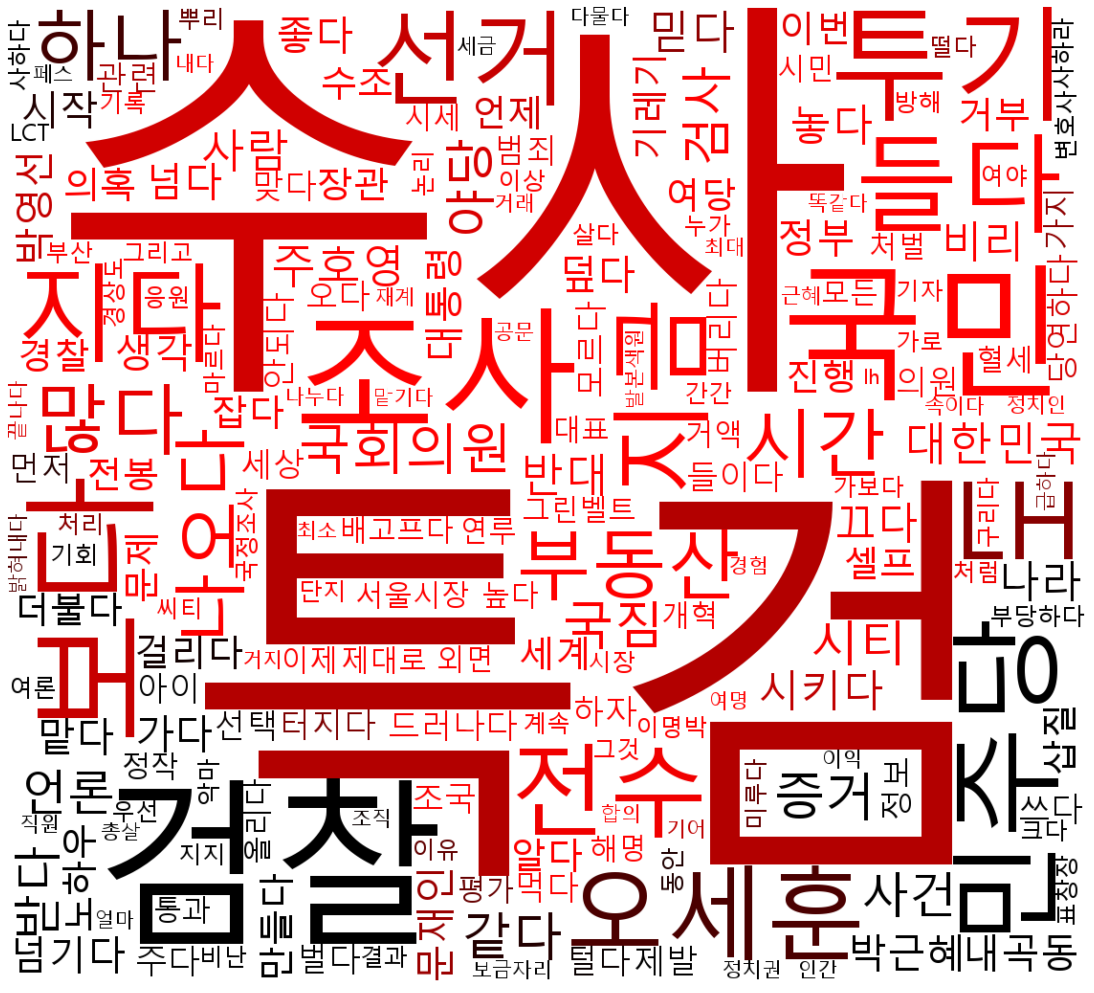

In [42]:
from wordcloud import ImageColorGenerator # Image로부터 Color를 생성(Generate)해내는 객체

coloring = np.array(Image.open("./heart.png"))
image_colors = ImageColorGenerator(coloring)

# WordCloud 객체를 생성
word_cloud = WordCloud(font_path="fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf" # 폰트 적용
                       width=1000, height=500,  
                       mask=coloring, 
                       background_color='white').generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15)) # 화면에서 보여지는 워드클라우드 크기 변경
plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear') # 다시(re) 색칠하기
# plt.imshow(word_cloud.recolor(colormap='Blues'), interpolation='bilinear') # Matplotlib colormap 활용 (http://j.mp/32UXOQ6)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
word_cloud.to_file("daum_word_cloud_coloring.png")

In [ ]:
coloring = np.array(Image.open("./yellow-house.png"))
image_colors = ImageColorGenerator(coloring)

word_cloud = WordCloud(font_path="fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000,  
                       mask=coloring, 
                       background_color='white').generate(doc)

plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 변경됨
plt.imshow(word_cloud) # image show
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()